## Evaporation propagation

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from types import SimpleNamespace
# plt.rcParams["figure.figsize"] = (10,6)

In [2]:
const = SimpleNamespace(r=0.1, 
                        mu=1e7, 
                        L=5.4e6, 
                        c=360., 
                        v_s=3710, 
                        lambd=390., 
                        rho=8.9e3, 
                        R=8.31)

const.chi = const.lambd/(const.rho*const.c)
const.U = 0.75*const.L/const.R

In [3]:
def T(x, q_0, par, const):
    v_f, T_f = par
    T_star = (1-const.r)*q_0/(const.rho*const.c*(const.mu*const.chi-v_f))
    return (T_f + T_star)*np.exp(-v_f/const.chi*x) - T_star*np.exp(-const.mu*x)

In [4]:
def v_f(T_f, q_0, const):
    return q_0*(1-const.r)/(const.rho*(const.L + const.c*T_f))

def T_f(v_f, const):
    return const.U/np.log(const.v_s/v_f)

def iterate(q_0, const, N=10):
    res = []
    v_f_0 = v_f(0, q_0, const)
    T_f_0 = T_f(v_f_0, const)
    res.append([v_f_0, T_f_0])
    for _ in range(N):
#         par.v_f = v_f(res[-1].T_f, q_0, const)
#         par.T_f = T_f(res[-1].v_f, const)
        res.append([v_f(res[-1][1], q_0, const), T_f(res[-1][0], const)])
    return res[-1]

In [5]:
def get_v_f_graph(const, save=False):
    q_0_vals = np.linspace(1e6, 1e9, 1000)
    v_f_vals = np.array([iterate(q_0,const)[0] for q_0 in q_0_vals])
    T_f_vals = np.array([iterate(q_0,const)[1] for q_0 in q_0_vals])
    
    fit = np.polyfit(q_0_vals, v_f_vals, deg=1)
    print(fit)
    
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10,12))
    ax1.plot(q_0_vals, v_f_vals)
#     ax1.plot(q_0_vals, [(fit[0]*x + fit[1]) for x in q_0_vals])
    ax2.plot(q_0_vals, T_f_vals)
    plt.xlabel(r'$q_0, V/m^2$')
    ax1.set_ylabel(r'$v_f, m/s$')
    ax2.set_ylabel(r'$T_f, K$')
    ax1.grid()
    ax2.grid()
    plt.show()
    
    if save:
        fig.savefig('v_f_and_T_f.pdf')
    print('NB: Output linear approximation')

In [22]:
def get_T_graph(q_0, const, save=False):
    x_vals = np.linspace(0, 1, 100)
    par = iterate(q_0, const)
    T_vals = np.array([T(x, q_0, par, const) for x in x_vals])
    fig = plt.figure(figsize=(10,6))
    plt.plot(x_vals, T_vals)
    plt.xlabel(r'$x, m$')
    plt.ylabel(r'$T, K$')
    plt.grid()
    plt.show()
    if save:
        fig.savefig('T(x).pdf')

[5.43257072e-12 8.88670325e-05]


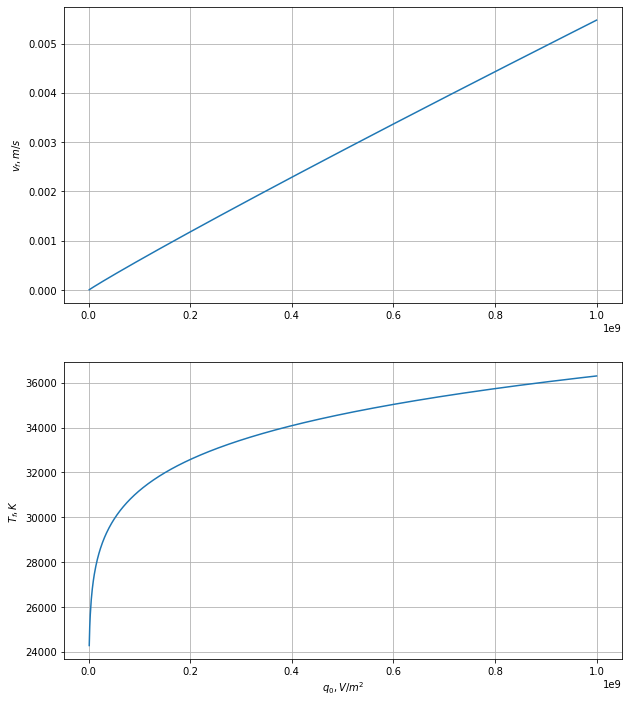

NB: Output linear approximation


In [10]:
get_v_f_graph(const, save=True)

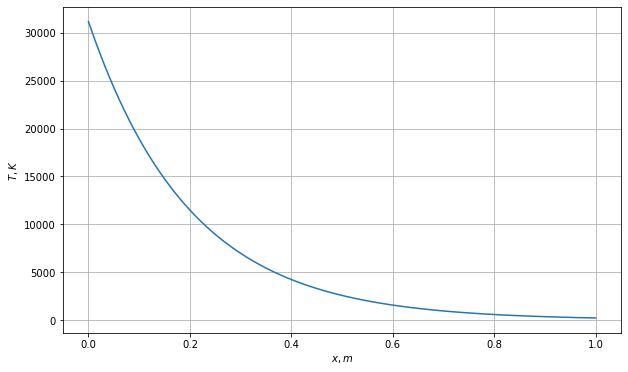

In [24]:
get_T_graph(q_0=1e8, const=const, save=True)